In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data/'
stocks = pd.read_csv(os.path.join(path, 'Stock Datasets/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns =['Unnamed: 0', 'MA_Six_Months', 'MA_One_Year'], inplace = True)
stocks

,Date,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $
0,1997-05-15,Amazon,1443120000,0.0979,0.1219,0.1250,0.0964
1,1997-05-16,Amazon,294000000,0.0865,0.0984,0.0990,0.0854
2,1997-05-19,Amazon,122136000,0.0854,0.0880,0.0885,0.0812
3,1997-05-20,Amazon,109344000,0.0818,0.0865,0.0875,0.0818
4,1997-05-21,Amazon,377064000,0.0714,0.0818,0.0823,0.0688
...,...,...,...,...,...,...,...
40164,2024-11-08,Tesla,204782800,321.2200,299.1400,328.7100,297.6600
40165,2024-11-11,Tesla,210521600,350.0000,346.3000,358.6400,336.0000
40166,2024-11-12,Tesla,155726000,328.4900,342.7400,345.8400,323.3100
40167,2024-11-13,Tesla,125405600,330.2400,335.8500,344.6000,322.5000


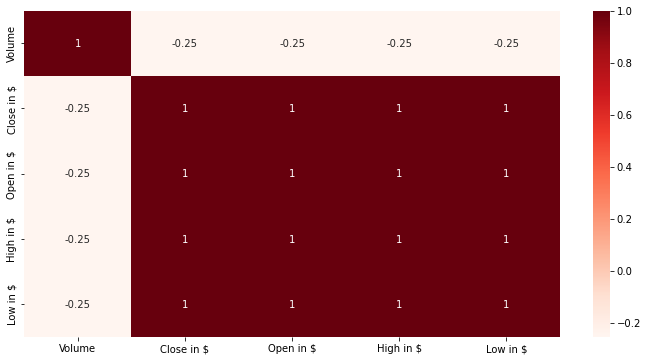

In [3]:
# Heat Map for Visualization Correlations

plt.figure(figsize=(12,6))
sns.heatmap(stocks.corr(),cmap = 'Reds', annot = True)
plt.show()

In [4]:
# Splitting the dataset 80% training and 20% testing
X = stocks[['Volume', 'Open in $', 'High in $', 'Low in $']].values
y = stocks['Close in $'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Creating regression model
regressor = LinearRegression()

# Fit linear regression model
model = regressor.fit(X_train, y_train)

# Use model to make prediction
y_pred = regressor.predict(X_test)

In [7]:
# With the test predictions complete, next step is to compare them (table of Actual Prices vs Predicted Prices)
# With the actual output values for X_test by organizing them in a dataframeformat

predicted = regressor.predict(X_test)
dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':predicted})
print(dfr)

      Actual_Price  Predicted_Price
0          44.0475        44.446664
1         332.4300       332.848465
2           0.4732         0.474415
3         517.9200       519.595284
4          26.5900        26.360513
...            ...              ...
8029        0.5056         0.515987
8030        0.3929         0.400635
8031       73.3300        73.749304
8032       56.5500        56.586649
8033        7.1573         7.195089

[8034 rows x 2 columns]


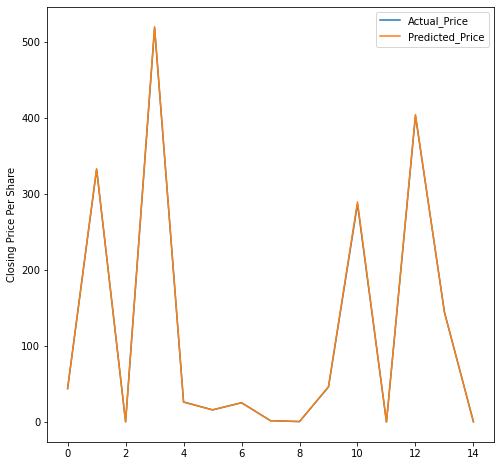

In [8]:
plt.figure(figsize = (8,8))
plt.ylabel('Closing Price Per Share')
plt.plot(dfr.head(15))
plt.legend(['Actual_Price', 'Predicted_Price'])

<AxesSubplot:>

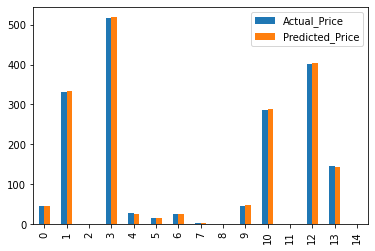

In [9]:
# Graph first 15 values

graph = dfr.head(15)
graph.plot(kind = 'bar')

In [10]:
# The predicted prices are extremely close to the actual prices

In [11]:
# Extreme Value Checks

In [12]:
stocks['Close in $'].mean()

70.87533921183014

In [13]:
stocks['Close in $'].std()

117.30020271536391

In [14]:
# Determining upper limit for outliers that are 2 standard deviations of the mean

upper_limit_1 = stocks['Close in $'].mean() + 2*(stocks['Close in $'].std())
upper_limit_1

305.47574464255797

In [15]:
# Determining lower limit for outliers that are 2 standard deviations of the mean

lower_limit_1 = stocks['Close in $'].mean() - 2*(stocks['Close in $'].std())
lower_limit_1

-163.72506621889767

In [16]:
stocks['Close in $'].max()

837.26

In [17]:
# Determing the percentage of values under 'Close/Last in $' column that are not outliers
# Dividing the number of values between 0 and upper limit and the total number of observations

len(stocks[stocks['Close in $']<upper_limit_1])/len(stocks)

0.9391072717767432

In [18]:
# About 6% of values under Close/Last in $ column are outliers

In [19]:
stocks['Volume'].mean()

137703815.51445144

In [20]:
stocks['Volume'].std()

220872381.53742522

In [21]:
# Determining upper limit for outliers that are 2 standard deviations of the mean

upper_limit_2 = stocks['Volume'].mean() + 2*(stocks['Volume'].std())
upper_limit_2

579448578.5893018

In [22]:
# Determining upper limit for outliers that are 2 standard deviations of the mean

lower_limit_2 = stocks['Volume'].mean() - 2*(stocks['Volume'].std())
lower_limit_2 

-304040947.560399

In [23]:
stocks['Volume'].max()

7421640800

In [24]:
# Determing the percentage of values under Volume column that are not outliers
# Dividing the number of values between 0 and upper limit and the total number of observations

len(stocks[stocks['Volume']<upper_limit_2])/len(stocks)

0.9567825935422839

In [25]:
# About 4% of values under Volume in $ column are outliers

In [26]:
# Original Hypothesis: If number of shares traded increases, the closing price decreases.

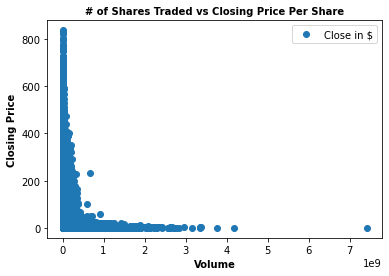

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

stocks.plot(x = 'Volume' , y ='Close in $', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('# of Shares Traded vs Closing Price Per Share', fontsize = 10, fontweight = 'bold')  
plt.xlabel('Volume', fontsize = 10, fontweight = 'bold')  
plt.ylabel('Closing Price', fontsize = 10, fontweight = 'bold')  
plt.show()

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = stocks['Volume'].values.reshape(-1,1)
y1 = stocks['Close in $'].values.reshape(-1,1)

In [29]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [30]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

# Fit the regression object onto the training set.

regression.fit(X1_train, y1_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y1_predicted = regression.predict(X1_test)

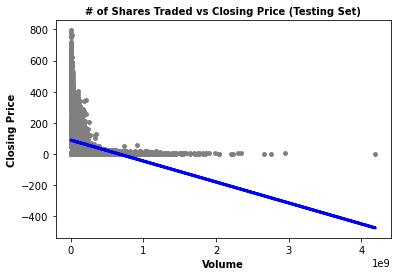

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color= 'gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color= 'blue', linewidth = 3)
plot_test.title('# of Shares Traded vs Closing Price (Testing Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Volume', fontsize = 10, fontweight = 'bold')
x_ticks = np.arange(0, 300, 50)
plot_test.ylabel('Closing Price', fontsize = 10, fontweight = 'bold')
plot_test.show()

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y1_test, y1_predicted).round() # This is the mean squared error
r2 = r2_score(y1_test, y1_predicted).round(2) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_.round(3))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.]]
Mean squared error:  13033.0
R2 score:  0.06


In [35]:
# Since this linear regression model is about 6% effective for my testing set, it's not the best fit for my data. 
# This could be due to data bias or not enough data points to produce significant results. 
# I'll need a model with more dimensionality to be able to predict what would effect the closing price of a stock

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,44.0475,73.462457
1,332.4300,87.110040
2,0.4732,34.507221
3,517.9200,89.104012
4,26.5900,81.087861
5,16.1886,83.699026
6,25.6100,80.847675
7,1.9913,86.826064
8,0.8385,82.883822
9,46.2557,86.858159


In [37]:
# The predicted values are extremely far from the actual values

In [38]:
# Compare how the regression fits the training set
y1_predicted_train = regression.predict(X1_train) # This is predicting X_train!

In [39]:
rmse = mean_squared_error(y1_train, y1_predicted_train).round()
r2 = r2_score(y1_train, y1_predicted_train).round(2)

In [40]:
print('Slope:' ,regression.coef_.round(3))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.]]
Mean squared error:  12834.0
R2 score:  0.06


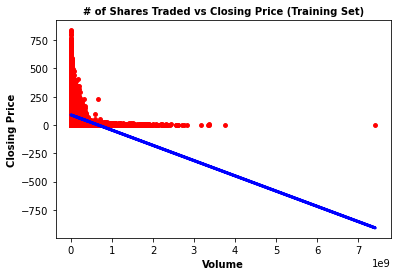

In [41]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X1_train, y1_train, color='red', s = 15)
plot_test.plot(X1_train, y1_predicted_train, color='blue', linewidth =3)
plot_test.title('# of Shares Traded vs Closing Price (Training Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Volume', fontsize = 10, fontweight = 'bold')
x_ticks = np.arange(0, 300, 50)
plot_test.ylabel('Closing Price', fontsize = 10, fontweight = 'bold')
plot_test.show()

In [42]:
# This linear regression model is about 6% effective for my training set, about same as my testing set